In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/dataset.csv'
df = pd.read_csv(dataset_path)
print(df.head(10))


  Company        Date Close/Last    Volume      Open       High       Low
0    AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1    AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2    AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3    AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4    AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
5    AAPL  07-10-2023    $188.61  59922160   $189.26    $189.99  $187.035
6    AAPL  07-07-2023    $190.68  46815000   $191.41    $192.67   $190.24
7    AAPL  07-06-2023    $191.81  45156010   $189.84    $192.02   $189.20
8    AAPL  07-05-2023    $191.33  46920260  $191.565    $192.98   $190.62
9    AAPL  07-03-2023    $192.46  31346600   $193.78    $193.88   $191.76


In [4]:
# Convert columns with dollar sign to numeric and Date column to datetime
cols_with_dollar = ['Close/Last', 'Open', 'High', 'Low']
df[cols_with_dollar] = df[cols_with_dollar].replace({'\$': '', ',': ''}, regex=True).astype(float)
def parse_mixed_dates(date_str):
    
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
            
            return pd.NaT


df['Date'] = df['Date'].apply(parse_mixed_dates)

print(df.head(10))
# Descriptive Statistics
#descriptive_stats = descriptive_stats.drop('count')

descriptive_stats = df.describe()
print(descriptive_stats)

path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/'

descriptive_stats.to_csv('descriptive_stats.csv')
descriptive_stats.to_excel('descriptive_stats.xlsx')
descriptive_stats.to_latex('descriptive_stats.tex')

  Company       Date  Close/Last    Volume     Open      High      Low
0    AAPL 2023-07-17      193.99  50520160  191.900  194.3200  191.810
1    AAPL 2023-07-14      190.69  41616240  190.230  191.1799  189.630
2    AAPL 2023-07-13      190.54  41342340  190.500  191.1900  189.780
3    AAPL 2023-12-07      189.77  60750250  189.680  191.7000  188.470
4    AAPL 2023-11-07      188.08  46638120  189.160  189.3000  186.600
5    AAPL 2023-10-07      188.61  59922160  189.260  189.9900  187.035
6    AAPL 2023-07-07      190.68  46815000  191.410  192.6700  190.240
7    AAPL 2023-06-07      191.81  45156010  189.840  192.0200  189.200
8    AAPL 2023-05-07      191.33  46920260  191.565  192.9800  190.620
9    AAPL 2023-03-07      192.46  31346600  193.780  193.8800  191.760
                                Date    Close/Last        Volume  \
count                          25160  25160.000000  2.516000e+04   
mean   2018-07-16 12:08:00.763115776    102.455878  5.131764e+07   
min            

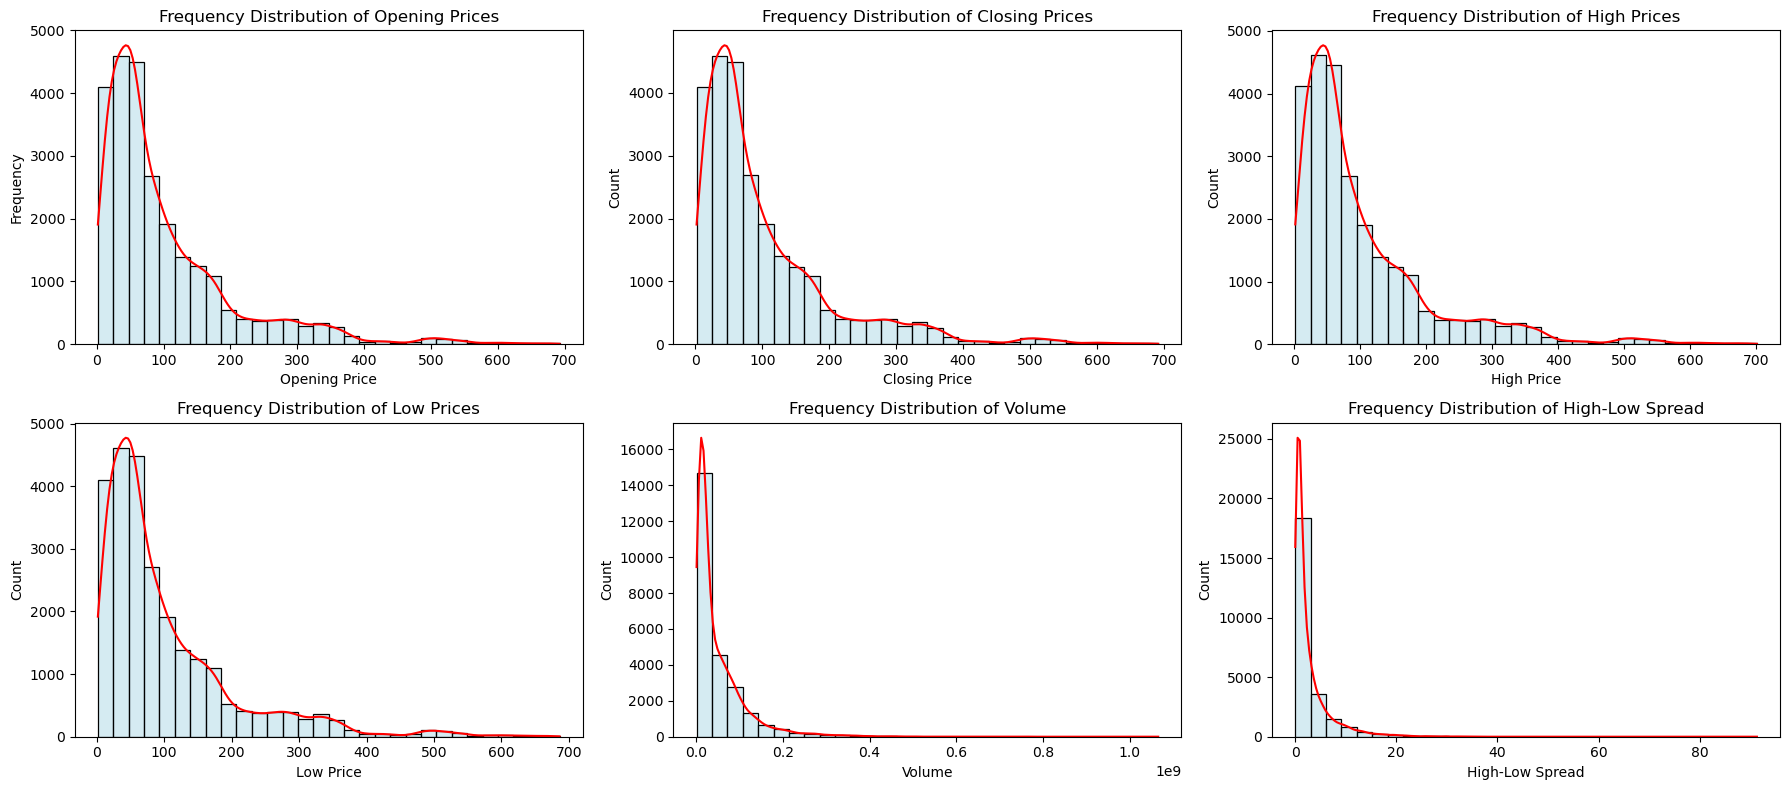

In [5]:


# Univariate Analysis: Frequency Distribution of Stock Prices and Volume

# Calculate High-Low Spread
df['High-Low Spread'] = df['High'] - df['Low']
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.histplot(df['Open'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(df['Close/Last'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of Closing Prices')
plt.xlabel('Closing Price')

plt.subplot(2, 3, 3)
sns.histplot(df['High'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of High Prices')
plt.xlabel('High Price')

plt.subplot(2, 3, 4)
sns.histplot(df['Low'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of Low Prices')
plt.xlabel('Low Price')

plt.subplot(2, 3, 5)
sns.histplot(df['Volume'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of Volume')
plt.xlabel('Volume')

plt.subplot(2, 3, 6)
sns.histplot(df['High-Low Spread'], bins=30, color='lightblue', kde=True)
plt.title('Frequency Distribution of High-Low Spread')
plt.xlabel('High-Low Spread')

for ax in plt.gcf().axes:
    for line in ax.get_lines():
        line.set_color('red')

plt.tight_layout()
plt.show()


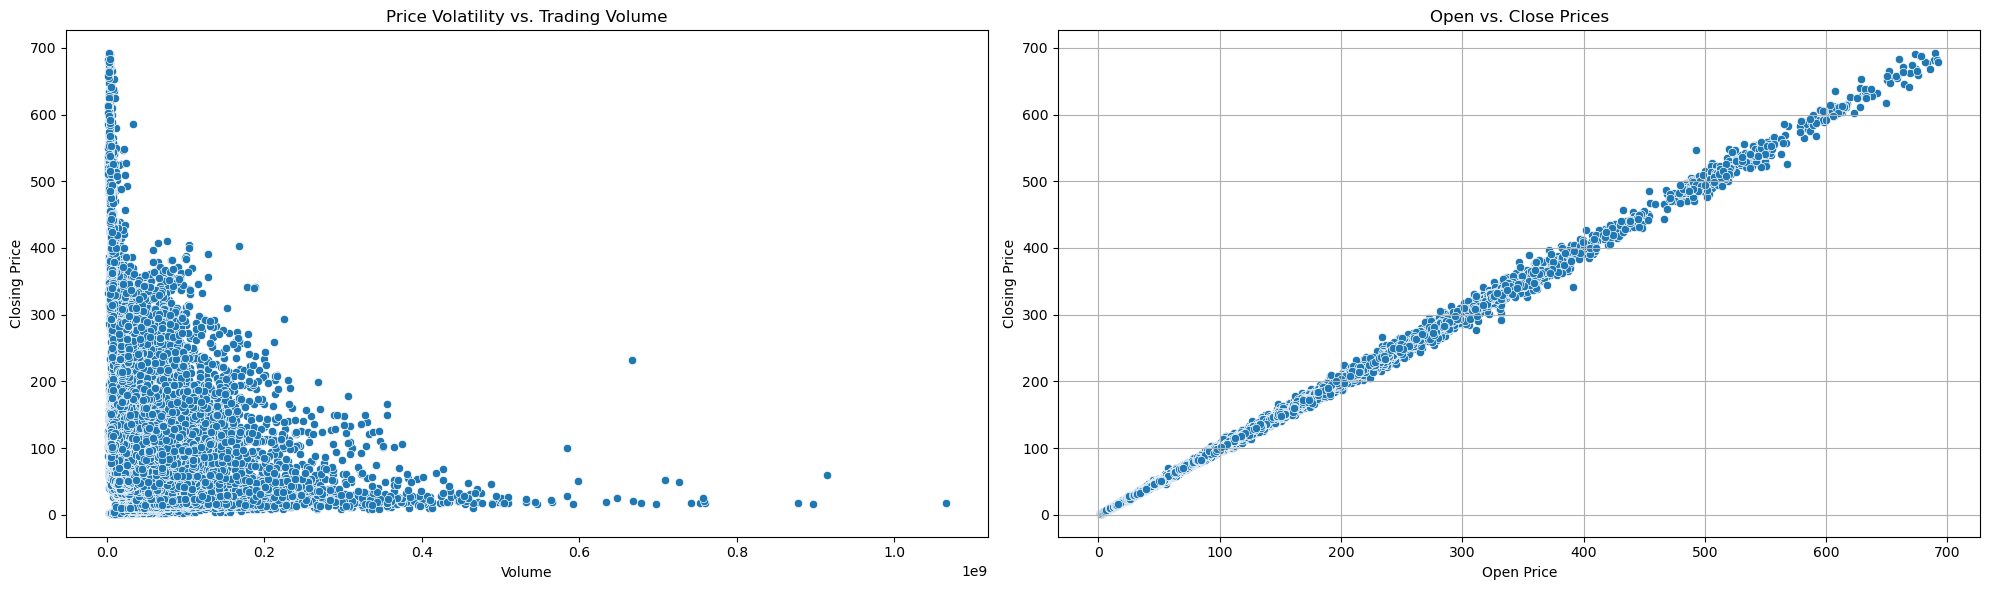

In [7]:

# Bivariate Analysis: Price Volatility vs. Trading Volume
plt.figure(figsize=(20, 6))

# First plot: Price Volatility vs. Trading Volume 
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='Volume', y='Close/Last', data=df)
plt.title('Price Volatility vs. Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')

# Second plot: Open vs. Close Prices 
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Open', y='Close/Last', data=df)
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Closing Price')

# Show the combined plot with both subplots
plt.grid(True)
plt.tight_layout()
plt.show()



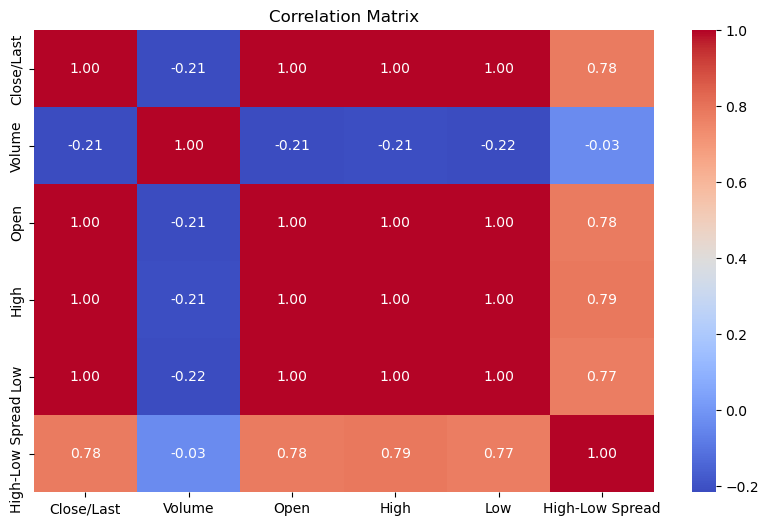

In [8]:

# Correlation Analysis
correlation_matrix = df[['Close/Last', 'Volume', 'Open', 'High', 'Low', 'High-Low Spread']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame, it has been pre-processed, and it contains a 'Company' column.
# Also assuming that 'df_scaled' contains your standardized features for PCA.

# Initialize PCA
pca = PCA(n_components=2)  # Here, we choose 2 components for illustration purposes

# Fit and transform the scaled data
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Add the 'Company' column to the PCA DataFrame
df_pca['Company'] = df['Company']

# Plotting the PCA result with different colors for each company
plt.figure(figsize=(10, 8))

# Use seaborn to make the scatterplot, with hue set to 'Company' column for color coding
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=df_pca, hue='Company', palette='Set1')

plt.title('PCA of Stock Market Data by Company')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'PCA' is not defined

In [12]:
pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 294.4 kB/s eta 0:00:00


In [5]:
from graphviz import Digraph

dot = Digraph(comment='Overall Methodology', format='png')
dot.attr(rankdir='TB', size='10')

# Graph style
dot.attr('node', shape='rectangle', style='filled', color='lightblue', fontname='Helvetica')
dot.attr('edge', color='blue', fontname='Helvetica')

# Nodes
dot.node('A', 'Data Collection')
dot.node('B', 'Data Preprocessing')
dot.node('C', 'Exploratory Data Analysis')
dot.node('D', 'Machine Learning Models for Prediction')
dot.node('E', 'Model Evaluation')
dot.node('F', 'Feature Importance\nand Dimensionality Reduction', fillcolor='lightgrey')
dot.node('G', 'Model Optimization')
dot.node('H', 'Results Interpretation\nand Reporting', fillcolor='lightgrey')

# Edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH'])

# Add subgraph for clustering specific phases
with dot.subgraph(name='cluster_0') as c:
    c.attr(color='blue')
    c.attr(label='Analysis Phase')
    c.node_attr['style'] = 'filled'
    c.node_attr['color'] = 'lightyellow'
    c.edges(['CD', 'DE', 'EF'])

# Render the graph to a file
dot.render('OverallMethodologyEnhanced', cleanup=True)

# This will save the enhanced graph as 'OverallMethodologyEnhanced.png' in your current directory.


'OverallMethodologyEnhanced.png'